In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Router(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.neighbor = []
        self.edge = []

class Edge(object):
    def __init__(self,x,y,l):
        self.start = x
        self.end = y
        self.len = int(int(l*10)/2+1)
        self.load = 0

class Data(object):
    def __init__(self,x,y,size,priority):
        self.now = x
        self.target = y
        self.size = size
        self.priority = priority
        self.time = 0
        self.edge = -1
        self.neigh = [priority,-1,-1,-1]

router = []
edges = []
t_edge = 0 ##keeps tracks of the number of edges in the graph
n_router = 25

0 0
0.25 0
0.5 0
0.75 0
1.0 0
0 0.25
0.25 0.25
0.5 0.25
0.75 0.25
1.0 0.25
0 0.5
0.25 0.5
0.5 0.5
0.75 0.5
1.0 0.5
0 0.75
0.25 0.75
0.5 0.75
0.75 0.75
1.0 0.75
0 1.0
0.25 1.0
0.5 1.0
0.75 1.0
1.0 1.0


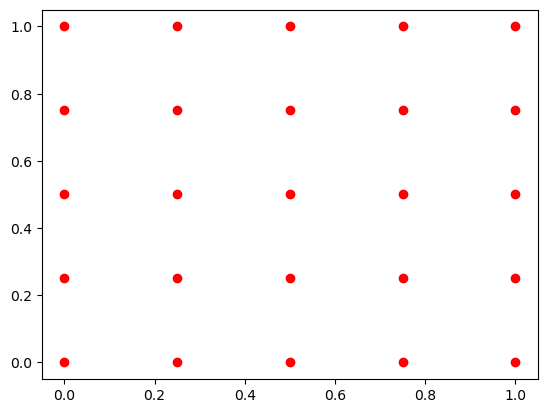

In [3]:
#Router Topology (Router Positions)
y_coordinate = 0
x_coordinate = 0
x_increment = 0.25
y_increment = 0.25
x_max = 1
y_max = float('inf')  # Assuming there's no maximum y-coordinate

for i in range(n_router):
    router.append(Router(x_coordinate, y_coordinate))
    x_coordinate += x_increment
    if x_coordinate > x_max:
        x_coordinate = 0
        y_coordinate += y_increment

for i in range(n_router):
	print(router[i].x,router[i].y)
	plt.scatter(router[i].x, router[i].y, color = 'red')
plt.show()

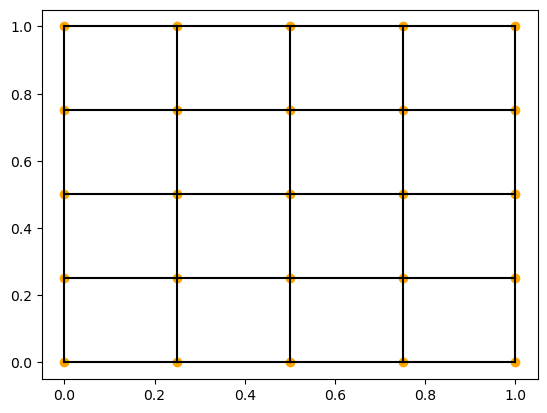

In [4]:
for i in range(n_router):
  dis = []
  for j in range(n_router):
    dis.append([(router[j].x - router[i].x)**2 + (router[j].y - router[i].y)**2, j])
  dis.sort(key = lambda x: x[0],reverse = False)

  for j in range(n_router):
    if(j==i):
      continue
    else:
      if(dis[j][0] == 0.0625):
        if dis[j][1] not in router[i].neighbor:
          router[i].neighbor.append(dis[j][1])
          router[dis[j][1]].neighbor.append(i)
          if i<dis[j][1]:
            edges.append(Edge(i,dis[j][1],np.sqrt(dis[j][0])))
            router[i].edge.append(t_edge)
            router[dis[j][1]].edge.append(t_edge)
            t_edge += 1
          else:
            edges.append(Edge(dis[j][1],i,np.sqrt(dis[j][0])))
            router[dis[j][1]].edge.append(t_edge)
            router[i].edge.append(t_edge)
            t_edge += 1

for i in range(n_router):
    plt.scatter(router[i].x, router[i].y, color = 'orange')
for e in edges:
    plt.plot([router[e.start].x,router[e.end].x],[router[e.start].y,router[e.end].y],color='black')

In [5]:
print("total no of edges: ",t_edge)
for i in range(n_router):
  print("Router {}: x = {} y = {} neighbor = {} edges = {}".format(i,router[i].x,router[i].y,router[i].neighbor,router[i].edge))
for i in range(t_edge):
  print("Edge {}: start_point = {} end_point = {} length = {}".format(i,edges[i].start,edges[i].end,edges[i].len))

total no of edges:  40
Router 0: x = 0 y = 0 neighbor = [1, 5] edges = [0, 1]
Router 1: x = 0.25 y = 0 neighbor = [0, 2, 6] edges = [0, 2, 3]
Router 2: x = 0.5 y = 0 neighbor = [1, 7, 3] edges = [2, 4, 5]
Router 3: x = 0.75 y = 0 neighbor = [2, 4, 8] edges = [5, 6, 14]
Router 4: x = 1.0 y = 0 neighbor = [3, 9] edges = [6, 7]
Router 5: x = 0 y = 0.25 neighbor = [0, 6, 10] edges = [1, 8, 9]
Router 6: x = 0.25 y = 0.25 neighbor = [1, 5, 7, 11] edges = [3, 8, 10, 11]
Router 7: x = 0.5 y = 0.25 neighbor = [2, 6, 8, 12] edges = [4, 10, 12, 13]
Router 8: x = 0.75 y = 0.25 neighbor = [7, 3, 9, 13] edges = [12, 14, 15, 16]
Router 9: x = 1.0 y = 0.25 neighbor = [4, 8, 14] edges = [7, 15, 17]
Router 10: x = 0 y = 0.5 neighbor = [5, 11, 15] edges = [9, 18, 19]
Router 11: x = 0.25 y = 0.5 neighbor = [6, 10, 12, 16] edges = [11, 18, 20, 21]
Router 12: x = 0.5 y = 0.5 neighbor = [7, 11, 13, 17] edges = [13, 20, 22, 23]
Router 13: x = 0.75 y = 0.5 neighbor = [8, 12, 14, 18] edges = [16, 22, 24, 25]
Ro

In [6]:
data = []
n_data = 20
for i in range(n_data):
    data.append(Data(np.random.randint(n_router),np.random.randint(n_router),np.random.random(),i))


for i in range(n_data):
    print("Data Packet {}: start_point = {}, target = {}, size = {}, priority = {}".format(i,data[i].now,data[i].target,data[i].size,data[i].priority))


Data Packet 0: start_point = 6, target = 19, size = 0.0974607522675186, priority = 0
Data Packet 1: start_point = 15, target = 24, size = 0.22174028250080213, priority = 1
Data Packet 2: start_point = 11, target = 8, size = 0.38104186533442985, priority = 2
Data Packet 3: start_point = 20, target = 10, size = 0.08947596241083411, priority = 3
Data Packet 4: start_point = 8, target = 14, size = 0.7455958141945903, priority = 4
Data Packet 5: start_point = 15, target = 12, size = 0.9058302362662206, priority = 5
Data Packet 6: start_point = 6, target = 10, size = 0.3021113774304298, priority = 6
Data Packet 7: start_point = 8, target = 16, size = 0.23901790731521488, priority = 7
Data Packet 8: start_point = 15, target = 9, size = 0.7283727415485173, priority = 8
Data Packet 9: start_point = 21, target = 17, size = 0.04789236614586201, priority = 9
Data Packet 10: start_point = 6, target = 24, size = 0.9015342384606367, priority = 10
Data Packet 11: start_point = 17, target = 19, size = 

In [7]:
import random
import pandas as pd


m, n = 5, 5  

# Generate 20 samples
data = []
for _ in range(20):
    source = (random.randint(0, m-1), random.randint(0, n-1))
    destination = (random.randint(0, m-1), random.randint(0, n-1))
    current_router = source  
    action = random.choice(['send', 'wait'])
    
    if action == 'send':
        if current_router[0] < destination[0]: 
            next_router = (current_router[0] + 1, current_router[1])
        elif current_router[0] > destination[0]:  
            next_router = (current_router[0] - 1, current_router[1])
        elif current_router[1] < destination[1]:  
            next_router = (current_router[0], current_router[1] + 1)
        elif current_router[1] > destination[1]:  
            next_router = (current_router[0], current_router[1] - 1)
        else:
            next_router = current_router  
    else:
        next_router = current_router  
    
    data.append([source, destination, current_router, action, next_router])

df = pd.DataFrame(data, columns=['Source', 'Destination','current_router','action','next_router'])


In [8]:
df.head()

,Source,Destination,current_router,action,next_router
0,"(2, 3)","(3, 4)","(2, 3)",wait,"(2, 3)"
1,"(0, 3)","(2, 3)","(0, 3)",send,"(1, 3)"
2,"(4, 4)","(1, 1)","(4, 4)",wait,"(4, 4)"
3,"(1, 3)","(3, 2)","(1, 3)",wait,"(1, 3)"
4,"(3, 0)","(1, 0)","(3, 0)",wait,"(3, 0)"


In [9]:
obs = []
def observation(router, edges, data, n_router, n_data, t_edge):
	
	for i in range(n_data):
		ob=[]

		####meta information####
		ob.append(data[i].now)
		ob.append(data[i].target)
		ob.append(data[i].edge)
		ob.append(data[i].size)
		ob.append(data[i].priority)

		####edge information####
		edge_count=0
		for j in router[data[i].now].edge:
			edge_count+=1
			ob.append(j)
			ob.append(edges[j].start)
			ob.append(edges[j].end)
			ob.append(edges[j].len)
			ob.append(edges[j].load)
		for j in range(4-edge_count): ####
			for k in range(5): ####
				ob.append(-1) #invalid placeholder  ####

		####other datas####
		count =0
		data[i].neigh = []
		data[i].neigh.append(i)

		for j in range(n_data):
			if j==i:
				continue
			if (data[j].now in router[data[i].now].neighbor)|(data[j].now == data[i].now):
				count+=1
				ob.append(data[j].now)
				ob.append(data[j].target)
				ob.append(data[j].edge)
				ob.append(data[j].size)
				ob.append(data[i].priority)
				data[i].neigh.append(j)

			if count==3:
				break
		for j in range(3-count):
			data[i].neigh.append(-1)
			for k in range(5):
				ob.append(-1) #invalid placeholder

		obs.append(np.array(ob))
	return obs



In [12]:
path = [[] for _ in range(n_data)]
print(path)

for i in range(n_data):
    path[i].append("Start:"+str(data[i].now))
print(path)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


AttributeError: 'list' object has no attribute 'now'

In [13]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, output_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_dim):
        super(Discriminator, self).__init__()
        self.input_size = input_size
        self.hidden_dim = hidden_dim
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


In [14]:
class QLearningModel(nn.Module):
    def __init__(self, state_size, action_size, hidden_dim):
        super(QLearningModel, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.hidden_dim = hidden_dim
        self.net = nn.Sequential(
            nn.Linear(state_size, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_size)
        )

    def forward(self, x):
        return self.net(x)


In [15]:
def train_gan(generator, discriminator, gen_optimizer, disc_optimizer, real_data_loader, epochs, device):
    criterion = nn.BCELoss()

    for epoch in range(epochs):
     for batch in real_data_loader:
            real_data = batch[0].to(device)
            batch_size = real_data.size(0)

            disc_optimizer.zero_grad()
            real_labels = torch.ones(batch_size, 1).to(device)
            real_output = discriminator(real_data)
            real_loss = criterion(real_output, real_labels)


            noise = torch.randn(batch_size, generator.input_size).to(device)
            fake_data = generator(noise)
            fake_labels = torch.zeros(batch_size, 1).to(device)
            fake_output = discriminator(fake_data.detach())
            fake_loss = criterion(fake_output, fake_labels)


            disc_loss = real_loss + fake_loss
            disc_loss.backward()
            disc_optimizer.step()


            gen_optimizer.zero_grad()
            trick_labels = torch.ones(batch_size, 1).to(device)
            trick_output = discriminator(fake_data)
            gen_loss = criterion(trick_output, trick_labels)

            # Update Generator
            gen_loss.backward()
            gen_optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss D: {disc_loss.item()}, Loss G: {gen_loss.item()}')


In [16]:

location_to_state = {}
for i in range(25):
    #location_to_state maps each location (node) in the grid to a state in the RL model.
    location_to_state[str(i+1)] = i

# # Print the dictionary to understand its structure

# print("location_to_state dictionary content:")
# for  value in location_to_state.items():
#     print(f"State: {value}")

In [17]:
def simulate_environment_response(current_state, action, reward_array, location_to_state, state_to_location, gamma=0.75, alpha=0.9, device='cpu'):

    invalid_state_tensor = torch.zeros(state_size).to(device)  # Adjust state size

    if current_state not in location_to_state:

        return invalid_state_tensor, torch.tensor([0.], device=device)

    current_state_index = location_to_state[current_state]

    next_state_index = action
    if next_state_index not in state_to_location:
        return invalid_state_tensor, torch.tensor([0.], device=device)

    next_state = state_to_location[next_state_index]
    reward = torch.tensor([reward_array[current_state_index, next_state_index]], device=device)

    return next_state, reward


In [18]:
def pretrain_q_learning_model(model, generator, pretrain_epochs, learning_rate, state_size, action_size, device, reward_array, location_to_state, state_to_location):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    for epoch in range(pretrain_epochs):
        noise = torch.randn((1, generator.input_size), device=device)
        synthetic_state = generator(noise)

        synthetic_state_flat = synthetic_state.view(-1)

        synthetic_state_flat = synthetic_state_flat.unsqueeze(0) if synthetic_state_flat.dim() == 1 else synthetic_state_flat

        q_values = model(synthetic_state_flat)  # Get Q-values from model
        _, predicted_action = torch.max(q_values, 1)  # Choose action

        predicted_action = predicted_action.item()  # Assuming action needs to be a scalar

        next_state, reward = simulate_environment_response(
            current_state=synthetic_state_flat,
            action=predicted_action,
            reward_array=reward_array,
            location_to_state=location_to_state,
            state_to_location=state_to_location,
            device=device
        )

        # Inside pretrain_q_learning_model
        if isinstance(next_state, str):  # This is just a debugging line
          next_state = torch.zeros(state_size).to(device)
          raise TypeError("next_state is a string, which is incorrect.")

        target_q_value = reward + torch.max(model(next_state)).detach()
        current_q_value = q_values[0][predicted_action]
        loss = criterion(current_q_value, target_q_value)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Pre-training Epoch {epoch}, Loss: {loss.item()}')


In [19]:
def fine_tune_q_learning_model(model, fine_tune_epochs, learning_rate, state_size, action_size, device, reward_array, location_to_state, state_to_location):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    for epoch in range(fine_tune_epochs):
        # Simulate receiving a real state from the NoC environment
        real_state = get_real_noc_state()

        # Ensure real_state is correctly shaped with a batch dimension
        real_state = real_state.unsqueeze(0) if real_state.dim() == 1 else real_state

        q_values = model(real_state.to(device))

        # If your model's output is expected to be [batch_size, number_of_actions]
        # then torch.max(q_values, 1) should work. However, if the batch size is 1,
        # you can use torch.max(q_values, dim=-1) to be dimension-agnostic
        _, predicted_action = torch.max(q_values, dim=-1)

        # Simulate the environment response
        # Ensure you pass all required arguments here
        next_state, reward = simulate_environment_response(real_state, predicted_action, reward_array, location_to_state, state_to_location)

        # Update Q-values
        target_q_value = reward + torch.max(model(next_state)).detach()
        current_q_value = q_values[0][predicted_action]
        loss = criterion(current_q_value, target_q_value)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Fine-tuning Epoch {epoch}, Loss: {loss.item()}')


In [20]:
# Initialize models
output_size = 130
input_size = 130  # Generator's output size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = 134
action_size = 5

generator = Generator(input_size=100, hidden_dim=128, output_size=134).to(device)  # Adjust output_size to 134

discriminator = Discriminator(input_size=134, hidden_dim=128).to(device)  # Adjust input_size to 134

q_model = QLearningModel(state_size=state_size, action_size=action_size, hidden_dim=128).to(device)

gen_optimizer = optim.Adam(generator.parameters(), lr=0.002)
disc_optimizer = optim.Adam(discriminator.parameters(), lr=0.002)
q_optimizer = optim.Adam(q_model.parameters(), lr=0.01)


In [22]:
def create_network_state_vectors(routers, edges, data_packets):
    state_vectors = []
    for data_packet in data_packets:
        state_vector = []

        for router in routers:
            state_vector.append(router.x)
            state_vector.append(router.y)
            # Add additional router-specific features as needed

        # Add features for each edge
        for edge in edges:
            state_vector.append(edge.len)
            state_vector.append(edge.load)
            # any other additional edge-specific features if needed

        # Add features for the data packet
        state_vector.append(data_packet.now)
        state_vector.append(data_packet.target)
        state_vector.append(data_packet.size)
        state_vector.append(data_packet.priority)

        # Append the state vector for this data packet to the list
        state_vectors.append(state_vector)

    return state_vectors

simulated_network_states = create_network_state_vectors(router, edges, data)


AttributeError: 'list' object has no attribute 'target'

In [ ]:
import csv

def create_network_state_vectors_and_export_csv(routers, edges, data_packets, csv_filename):
    state_vectors = []

    # Open a CSV file for writing
    with open(csv_filename, 'w', newline='') as csvfile:
        # Initialize a CSV writer
        csvwriter = csv.writer(csvfile)

        # (Optional) Write headers to the CSV file
        headers = ['router_x', 'router_y'] * len(routers) + \
                  ['edge_len', 'edge_load'] * len(edges) + \
                  ['data_now', 'data_target', 'data_size', 'data_priority']
        csvwriter.writerow(headers)

        for data_packet in data_packets:
            state_vector = []

            for router in routers:
                state_vector.append(router.x)
                state_vector.append(router.y)
                # Add additional router-specific features as needed

            # Add features for each edge
            for edge in edges:
                state_vector.append(edge.len)
                state_vector.append(edge.load)
                # any other additional edge-specific features if needed

            # Add features for the data packet
            state_vector.append(data_packet.now)
            state_vector.append(data_packet.target)
            state_vector.append(data_packet.size)
            state_vector.append(data_packet.priority)

            # Append the state vector for this data packet to the list
            state_vectors.append(state_vector)

            # Write the state vector to the CSV file
            csvwriter.writerow(state_vector)

    return state_vectors

# Example usage
csv_filename = 'simulated_network_states.csv'
simulated_network_states = create_network_state_vectors_and_export_csv(router, edges, data, csv_filename)


In [ ]:
len(simulated_network_states)

20

In [ ]:

from torch.utils.data import DataLoader, TensorDataset


simulated_data_tensors = torch.tensor(simulated_network_states, dtype=torch.float32)
data_loader = DataLoader(TensorDataset(simulated_data_tensors), batch_size=64, shuffle=True)


## checking if dataloader is sending bataches correctly

In [ ]:
for batch in data_loader:
    print(type(batch), type(batch[0]))
    break


<class 'list'> <class 'torch.Tensor'>


In [ ]:
# Assuming you have defined the train_gan function and initialized the GAN components as shown earlier
train_gan(generator, discriminator, gen_optimizer, disc_optimizer, data_loader, epochs=1000, device=device)


Epoch [1000/1000], Loss D: 0.0014868066646158695, Loss G: 7.0958051681518555


In [ ]:
# Set the number of synthetic samples you want to generate
num_synthetic_samples = 1000
synthetic_states = []

with torch.no_grad():
    for _ in range(num_synthetic_samples):
        noise = torch.randn((1, generator.input_size), device=device)  # Generate random noise
        synthetic_state = generator(noise)  # Generate a synthetic state
        synthetic_states.append(synthetic_state)

# Convert list of tensors to a single tensor
synthetic_states_tensor = torch.cat(synthetic_states, dim=0)


In [ ]:
state_to_location = dict((state,location) for location,state in location_to_state.items())
print(state_to_location)

{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10', 10: '11', 11: '12', 12: '13', 13: '14', 14: '15', 15: '16', 16: '17', 17: '18', 18: '19', 19: '20', 20: '21', 21: '22', 22: '23', 23: '24', 24: '25'}


In [ ]:
reward_array = np.zeros((5,5))

# Make sure these variables are defined and properly set up before this call
pretrain_q_learning_model(
    q_model,
    generator,
    pretrain_epochs=1000,
    learning_rate=0.01,
    state_size=state_size,
    action_size=action_size,
    device=device,
    reward_array=reward_array,  # This should be your NoC's reward matrix
    location_to_state=location_to_state,  # Mapping from NoC locations to state indices
    state_to_location=state_to_location   # Mapping from state indices back to NoC locations
)


Pre-training Epoch 0, Loss: 0.00037258228985592723
Pre-training Epoch 10, Loss: 0.038159459829330444
Pre-training Epoch 20, Loss: 3.68067849194631e-05
Pre-training Epoch 30, Loss: 4.3972605112685414e-07
Pre-training Epoch 40, Loss: 0.05214172229170799
Pre-training Epoch 50, Loss: 0.009490402415394783
Pre-training Epoch 60, Loss: 0.015442567877471447
Pre-training Epoch 70, Loss: 0.0017093076603487134
Pre-training Epoch 80, Loss: 0.0015598675236105919
Pre-training Epoch 90, Loss: 0.0014852631138637662
Pre-training Epoch 100, Loss: 0.001268051564693451
Pre-training Epoch 110, Loss: 0.00012957406579516828
Pre-training Epoch 120, Loss: 2.358632264076732e-05
Pre-training Epoch 130, Loss: 0.0002914267242886126
Pre-training Epoch 140, Loss: 2.6663003154681064e-05
Pre-training Epoch 150, Loss: 5.040242467657663e-05
Pre-training Epoch 160, Loss: 0.00014368537813425064
Pre-training Epoch 170, Loss: 5.8611065469449386e-05
Pre-training Epoch 180, Loss: 4.859933255829674e-07
Pre-training Epoch 190, 

/Users/hritik/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Pre-training Epoch 350, Loss: 0.00012593281280715019
Pre-training Epoch 360, Loss: 1.9394477931200527e-05
Pre-training Epoch 370, Loss: 3.703140828292817e-05
Pre-training Epoch 380, Loss: 2.7689922717399895e-05
Pre-training Epoch 390, Loss: 3.0350796805578284e-05
Pre-training Epoch 400, Loss: 2.9847456971765496e-05
Pre-training Epoch 410, Loss: 0.002090004039928317
Pre-training Epoch 420, Loss: 8.597710802860092e-06
Pre-training Epoch 430, Loss: 5.403424074756913e-05
Pre-training Epoch 440, Loss: 3.7925881770206615e-05
Pre-training Epoch 450, Loss: 3.890518200933002e-06
Pre-training Epoch 460, Loss: 6.7428391048451886e-06
Pre-training Epoch 470, Loss: 5.76823549636174e-06
Pre-training Epoch 480, Loss: 5.1833967518177815e-06
Pre-training Epoch 490, Loss: 4.6359095904335845e-06
Pre-training Epoch 500, Loss: 3.83597625841503e-06
Pre-training Epoch 510, Loss: 0.00015223507944028825
Pre-training Epoch 520, Loss: 2.0226300989634183e-07
Pre-training Epoch 530, Loss: 8.34187630971428e-07
Pre-t

In [ ]:
q_model.eval()

with torch.no_grad():  # No need to track gradients during evaluation
    for i, test_state in enumerate(synthetic_states_tensor):

        state_tensor = test_state.clone().detach().to(device) if isinstance(test_state, torch.Tensor) else torch.tensor(test_state, dtype=torch.float32).to(device)

        q_values = q_model(state_tensor)
        predicted_action = torch.argmax(q_values, dim=0).item()
        if i < 10:
            print(f"Test State is: {test_state}, Predicted Action is: {predicted_action}")


Test State is: tensor([-0.1525, -0.1877, -0.4503,  0.4516, -0.0534,  0.6490,  0.1385, -0.1446,
        -0.0420,  0.3243,  0.0414,  0.0929, -0.1552, -0.4238,  0.6338,  0.2096,
        -0.4103, -0.3323,  0.0397,  0.1428,  0.4515,  0.0408,  0.6380,  0.2637,
         0.6124, -0.2353, -0.3691,  0.2028,  0.4714, -0.0021,  0.3056,  0.7582,
         0.2196, -0.2864,  0.0283, -0.0096,  0.2314, -0.0127,  0.0946,  0.6736,
        -0.5542,  0.0182,  0.4419,  0.4506,  0.1325,  0.2772,  0.2443,  0.0942,
         0.2296,  0.7035,  0.1669,  0.3658,  0.1168, -0.3996,  0.6266, -0.2591,
         0.5369, -0.2640,  0.7786,  0.6306,  0.5988,  0.0653,  0.6530,  0.1478,
         0.8231, -0.1429,  0.0030, -0.4164,  0.5666, -0.1911,  0.2291, -0.1864,
         0.5447,  0.0169,  0.6315,  0.0717,  0.3400,  0.2123,  0.8464,  0.1693,
         0.6057,  0.3554,  0.5132, -0.6289, -0.1235, -0.2365,  0.0190, -0.6389,
         0.6283,  0.2904,  0.4410,  0.4023, -0.1053, -0.2010,  0.4404, -0.1245,
         0.1036, -0.2252,

In [ ]:
def get_real_noc_state():
    
    state = torch.randn(state_size)  # Generate a random state
    return state.to(device)


In [ ]:
def run_fine_tuning_for_learning_rates(model, fine_tune_epochs, learning_rates, state_size, action_size, device, reward_array, location_to_state, state_to_location):
    # Dictionary to hold the average losses for each learning rate
    avg_losses_per_lr = {}

    # Loop over different learning rates
    for lr in learning_rates:
        print(f"Fine-tuning with learning rate: {lr}")
        # Assuming fine_tune_q_learning_model is modified to accept and properly use the new parameters
        avg_loss = fine_tune_q_learning_model(model, fine_tune_epochs, lr, state_size, action_size, device, reward_array, location_to_state, state_to_location)
        avg_losses_per_lr[lr] = avg_loss

    return avg_losses_per_lr


# Define your parameters
fine_tune_epochs = 1000
learning_rates = [0.01, 0.001, 0.0001]  # Example learning rates
state_size = state_size  # Define your state size
action_size = action_size  # Define your action size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Example usage:
# Make sure to define or obtain reward_array, location_to_state, and state_to_location before calling this function
avg_losses = run_fine_tuning_for_learning_rates(
    q_model,
    fine_tune_epochs,
    learning_rates,
    state_size,
    action_size,
    device,
    reward_array,  # Make sure this is defined
    location_to_state,  # Make sure this is defined
    state_to_location  # Make sure this is defined
)


# # Plotting the results
# plt.figure(figsize=(10, 6))
# plt.plot(learning_rates, [avg_losses[lr] for lr in learning_rates], marker='o')
# plt.xlabel('Learning Rate')
# plt.ylabel('Average Loss')
# plt.title('Average Loss vs. Learning Rate')
# plt.xscale('log')  # Since


Fine-tuning with learning rate: 0.01
Fine-tuning Epoch 0, Loss: 0.048444051295518875
Fine-tuning Epoch 10, Loss: 0.014535429887473583
Fine-tuning Epoch 20, Loss: 0.37447160482406616
Fine-tuning Epoch 30, Loss: 0.14997498691082
Fine-tuning Epoch 40, Loss: 0.2912318706512451
Fine-tuning Epoch 50, Loss: 0.036051228642463684
Fine-tuning Epoch 60, Loss: 1.9036213159561157
Fine-tuning Epoch 70, Loss: 0.02005540020763874
Fine-tuning Epoch 80, Loss: 6.5513014793396
Fine-tuning Epoch 90, Loss: 6.947090148925781
Fine-tuning Epoch 100, Loss: 0.046234406530857086
Fine-tuning Epoch 110, Loss: 0.02234553173184395
Fine-tuning Epoch 120, Loss: 0.01572834886610508
Fine-tuning Epoch 130, Loss: 0.18213367462158203
Fine-tuning Epoch 140, Loss: 0.022762281820178032
Fine-tuning Epoch 150, Loss: 2.9121086597442627
Fine-tuning Epoch 160, Loss: 2.153000593185425
Fine-tuning Epoch 170, Loss: 0.6290460228919983
Fine-tuning Epoch 180, Loss: 0.19732019305229187
Fine-tuning Epoch 190, Loss: 1.185127854347229
Fine-t

In [ ]:
print(avg_losses)


{0.01: None, 0.001: None, 0.0001: None}


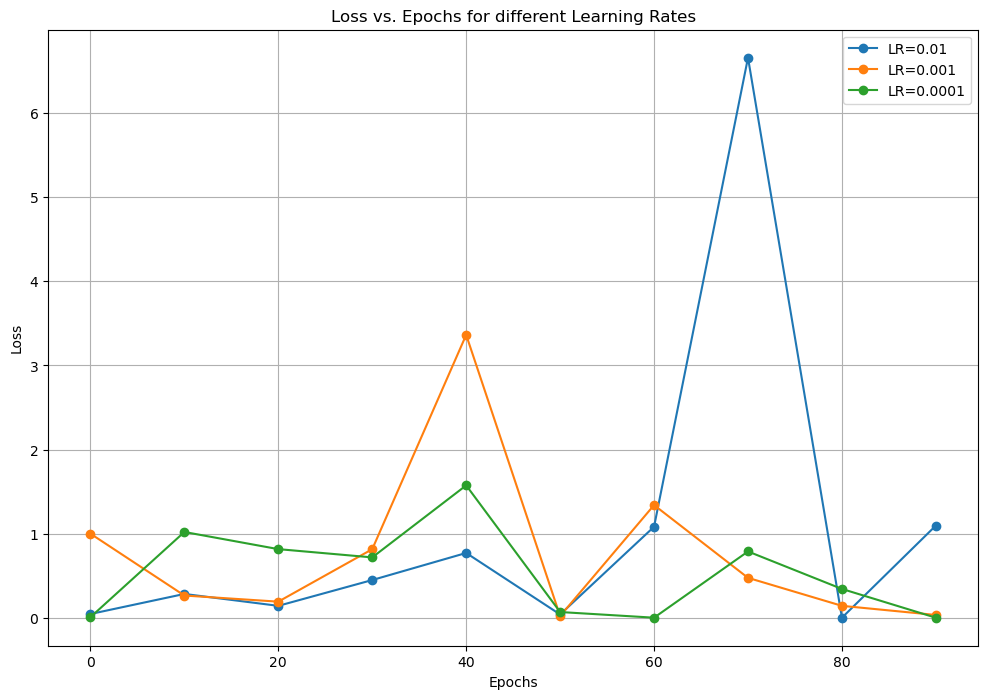

In [ ]:
import matplotlib.pyplot as plt

# Loss values for each learning rate
losses = {
    0.01: [0.04436193406581879, 0.2828226089477539, 0.14149786531925201, 0.4483889043331146, 0.7703043818473816, 0.038790225982666016, 1.0821348428726196, 6.659852027893066, 0.00027566778589971364, 1.0962485074996948],
    0.001: [0.9997183084487915, 0.26420366764068604, 0.19119352102279663, 0.8151378631591797, 3.363884449005127, 0.0203425120562315, 1.3398990631103516, 0.4744490087032318, 0.14148609340190887, 0.03283276781439781],
    0.0001: [0.006462021265178919, 1.019790768623352, 0.8158676028251648, 0.7175911664962769, 1.574131965637207, 0.06792581081390381, 0.0005035356152802706, 0.7881684899330139, 0.3424261212348938, 0.0001799016899894923]
}

# Prepare the plot
plt.figure(figsize=(12, 8))

# Epochs to plot against
epochs = range(0, 100, 10)  # Assuming you have 10 data points, matching your loss intervals

# Plot each learning rate's losses
for lr, lr_losses in losses.items():
    plt.plot(epochs, lr_losses, marker='o', label=f'LR={lr}')

# Adding plot details
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for different Learning Rates')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
def find_optimal_path(model, source, destination, state_to_location, location_to_state, device):
    model.eval()
    if str(source) not in location_to_state or str(destination) not in location_to_state:
        print(f"Source or destination not found in location_to_state dictionary. Source: {source}, Destination: {destination}")
        return []

    path = [str(source)]
    current_state = str(source)

    while current_state != str(destination):
        state_index = location_to_state[current_state]  # Convert location to state index

        # Create a one-hot encoded tensor based on the state index
        state_vector = torch.zeros([1, 134], dtype=torch.float32)  # Adjust 134 to your actual state size
        state_vector[0][state_index] = 1  # Set the appropriate index to 1 for one-hot encoding

        state_vector = state_vector.to(device)  # Move to the correct device

        with torch.no_grad():
            q_values = model(state_vector)
        predicted_action = torch.argmax(q_values, dim=1).item()

        next_state = state_to_location[predicted_action]
        if next_state in path:
            print("Cycle detected. Terminating path search.")
            break

        path.append(next_state)
        current_state = next_state

    return path


In [ ]:

test_pairs = [('5','10'),('1','25'),('3','10')]
""
for source, destination in test_pairs:
    path = find_optimal_path(q_model, source, destination, state_to_location, location_to_state, device)
    print(f"Optimal path from {source} to {destination}: {path}")


Cycle detected. Terminating path search.
Optimal path from 5 to 10: ['5', '3']
Cycle detected. Terminating path search.
Optimal path from 1 to 25: ['1', '3']
Cycle detected. Terminating path search.
Optimal path from 3 to 10: ['3']


In [ ]:
paths = {f"{src} to {dest}": find_optimal_path(q_model, src, dest, state_to_location, location_to_state, device) for src, dest in test_pairs}

Cycle detected. Terminating path search.
Cycle detected. Terminating path search.
Cycle detected. Terminating path search.


In [ ]:
def convert_path_to_grid(path, size):
    grid_path = []
    for node_label in path:
        node_index = int(node_label) - 1  # Convert label to 0-based index
        row = node_index // size
        col = node_index % size
        grid_path.append((row, col))
    return grid_path


Cycle detected. Terminating path search.
Cycle detected. Terminating path search.
Cycle detected. Terminating path search.


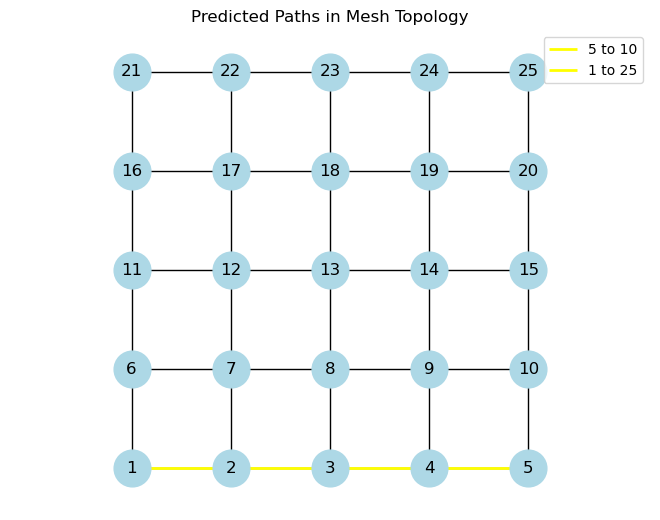

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


source_dest_pairs = [('5','10'),('1','25'),('3','10')]

size = 5  # Mesh size
G = nx.grid_2d_graph(size, size)
pos = {(x, y): (y, -x) for x, y in G.nodes()}
labels = {(x, y): str(x * size + y + 1) for x, y in G.nodes()}

paths = {f"{src} to {dest}": find_optimal_path(q_model, src, dest, state_to_location, location_to_state, device) for src, dest in source_dest_pairs}

nx.draw(G, pos, labels=labels, with_labels=True, node_size=700, node_color='lightblue')

for label, path in paths.items():
    grid_path = convert_path_to_grid(path, size)
    edges = list(zip(grid_path[:-1], grid_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='yellow', style='solid', label=label)

plt.legend()
plt.title("Predicted Paths in Mesh Topology")
plt.axis('equal')
plt.gca().invert_yaxis()
plt.show()
